## Introduction

In [1]:
import DSGRN
import Berry_2019_figures_results as Berry
from min_interval_posets import posets, poset_distance
from copy import deepcopy
from numpy import linspace
from IPython import display
import matplotlib.pyplot as plt
# from matplotlib import cm
from importlib import reload
from matplotlib import rc
rc('text', usetex=True)
fontsize=20
rc('axes', labelsize=fontsize)    # fontsize of the x and y labels
rc('xtick', labelsize=fontsize)    # fontsize of the tick labels
rc('ytick', labelsize=fontsize)    # fontsize of the tick labels
rc('legend', fontsize=12)    # legend fontsize
%matplotlib inline

In [2]:
wt1_file = "WT1_WT2_microarray_interpolated/wt1_microarray_coregenes_lifepoints_interpol_trim.csv"
wt2_file = "WT1_WT2_microarray_interpolated/wt2_microarray_coregenes_lifepoints_interpol.csv"


In [3]:
# graph data
def make_fig(fname,savename,start_time=None,end_time=None,names=None):
    curves = Berry.row(fname)
    subset_curves = deepcopy(curves)
    if names is not None:
        for name in curves:
            if name not in names:
                subset_curves.pop(name)
    for name,curve in subset_curves.items():
        n = curve.normalize()
        if start_time is not None and end_time is not None:
            n = curve.trim(start_time,end_time)
        times,vals = zip(*n.items())
        plt.plot(times,vals,label=r"${}$".format(name))
    lgd = plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.ylabel(r"\textbf{normalized expression}")
    plt.xlabel(r"\textbf{time points}")
    plt.savefig(savename,bbox_extra_artists=(lgd,), bbox_inches='tight') 
    plt.savefig(savename, bbox_inches='tight') 
    display.display(plt.show())
    return [name for name in sorted(curves)]
    

In [4]:
start_time = 26
end_time = 170
names = ["CDC20"]
epsilons = [0.00, 0.01, 0.02, 0.03, 0.04, 0.05]



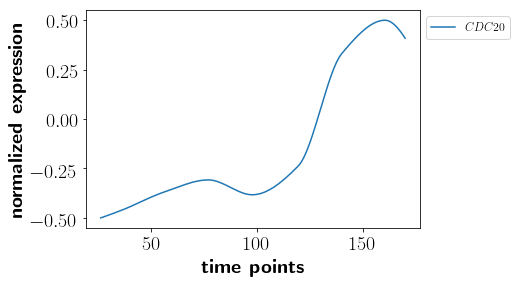

None

In [5]:
_ = make_fig(wt1_file,"time_series_wt1_{}_trimmed.pdf".format(names[0]),start_time,end_time,names)
# _ = make_fig(wt2_file,"time_series_rep2_trimmed.pdf",start_time,end_time,names)

In [6]:
intervals = Berry.getintervals(wt1_file,"row",epsilons,names,start_time,end_time)
for intv in intervals[names[0]]:
    print(intv)

(0.0, [((26.0, 26.0), ('CDC20', 'min')), ((77.0, 77.0), ('CDC20', 'max')), ((98.0, 98.0), ('CDC20', 'min')), ((160.0, 160.0), ('CDC20', 'max')), ((170.0, 170.0), ('CDC20', 'min'))])
(0.01, [((26.0, 32.0), ('CDC20', 'min')), ((66.0, 84.0), ('CDC20', 'max')), ((90.0, 105.0), ('CDC20', 'min')), ((154.0, 165.0), ('CDC20', 'max')), ((168.0, 170.0), ('CDC20', 'min'))])
(0.02, [((26.0, 37.0), ('CDC20', 'min')), ((61.0, 88.0), ('CDC20', 'max')), ((86.0, 109.0), ('CDC20', 'min')), ((151.0, 167.0), ('CDC20', 'max')), ((167.0, 170.0), ('CDC20', 'min'))])
(0.03, [((26.0, 41.0), ('CDC20', 'min')), ((56.0, 92.0), ('CDC20', 'max')), ((82.0, 111.0), ('CDC20', 'min')), ((149.0, 169.0), ('CDC20', 'max')), ((165.0, 170.0), ('CDC20', 'min'))])
(0.04, [((26.0, 45.0), ('CDC20', 'min')), ((147.0, 170.0), ('CDC20', 'max')), ((163.0, 170.0), ('CDC20', 'min'))])
(0.05, [((26.0, 49.0), ('CDC20', 'min')), ((145.0, 170.0), ('CDC20', 'max'))])


In [7]:
def makeboxes(intervals,start_time,end_time,savename="intervals_CDC20.pdf"):
    marker = "s"
    for k,i in enumerate(intervals):
        eps = i[0]
        ints = i[1]
        for j in ints:
            xl = (int(j[0][0]),int(j[0][1])+1)
            x = list(range(*xl))
            if j[1][1] == "min":
                color = "k"
            else:
                color = "r"
            if len(x) == 1:
                alpha = 0.25
            else:
                alpha = 0.1
            plt.plot(x,[eps]*len(x),linestyle=None,marker=marker,color=color,alpha=alpha)
#     plt.xlim(start_time,end_time) 
    plt.yticks(epsilons)
    plt.ylabel(r"$\mbox{{\Huge$\epsilon$}}$")
    plt.xlabel(r"\textbf{time points}")
    plt.savefig(savename, bbox_inches='tight') 
    display.display(plt.show())
            
    
    


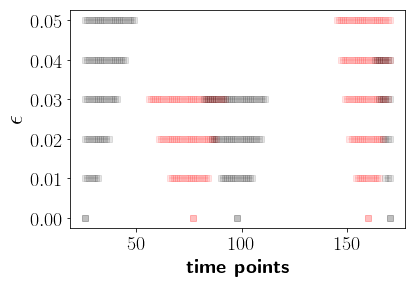

None

In [8]:
makeboxes(intervals[names[0]],start_time,end_time)

In [ ]:
def make_posets(p,network):
    events = list(p[1][0])
    event_ordering = list(p[1][1]) 
    poe = DSGRN.PosetOfExtrema(network, events, event_ordering)
#     return poe,p[0]

In [ ]:
names = ["CDC20","NDD1"]

posets1 = Berry.getposets(wt1_file,"row",epsilons,names,start_time,end_time)
for p in posets1:
    print(p)
    

(0.0, ((('NDD1', 'max'), ('NDD1', 'min'), ('NDD1', 'max'), ('NDD1', 'min'), ('CDC20', 'min'), ('CDC20', 'max'), ('CDC20', 'min'), ('CDC20', 'max'), ('CDC20', 'min')), {(7, 3), (4, 7), (1, 3), (4, 8), (5, 6), (2, 8), (0, 7), (6, 2), (1, 6), (0, 3), (5, 8), (1, 2), (6, 7), (6, 3), (1, 5), (4, 1), (4, 5), (5, 2), (2, 3), (0, 5), (4, 2), (0, 8), (5, 3), (0, 1), (2, 7), (4, 6), (6, 8), (5, 7), (0, 6), (1, 8), (4, 3), (1, 7), (7, 8), (0, 2)}))
(0.01, ((('NDD1', 'max'), ('NDD1', 'min'), ('NDD1', 'max'), ('NDD1', 'min'), ('CDC20', 'min'), ('CDC20', 'max'), ('CDC20', 'min'), ('CDC20', 'max'), ('CDC20', 'min')), {(7, 3), (4, 7), (1, 3), (4, 8), (5, 6), (2, 8), (0, 7), (6, 2), (1, 6), (0, 3), (5, 8), (1, 2), (6, 7), (6, 3), (1, 5), (4, 1), (4, 5), (5, 2), (2, 3), (0, 5), (4, 2), (0, 8), (5, 3), (0, 1), (2, 7), (4, 6), (6, 8), (5, 7), (0, 6), (1, 8), (4, 3), (1, 7), (7, 8), (0, 2)}))
(0.02, ((('NDD1', 'max'), ('NDD1', 'min'), ('NDD1', 'max'), ('NDD1', 'min'), ('CDC20', 'min'), ('CDC20', 'max'), ('

In [ ]:
wavepool = DSGRN.Network("good_wavepool.txt")
# DSGRN.DrawGraph(wavepool)

In [ ]:
for p in posets1:
    poe, eps = make_posets(p,wavepool)
    print(poe)
#     display.display(DSGRN.DrawGraph(poe))
#     with open("example_poset_app2_rep1_{}.dot".format(int(eps*100)),"w") as f:
#         f.write(poe.graphviz())


In [ ]:
def change_labels(posets,start_name,end_name):
    relabeled_posets = []
    for eps,pos in posets:
        extrema = pos[0]
        newex = []
        for ex in extrema:
            if ex[0] == start_name:
                newex.append((end_name,ex[1]))
            else:
                newex.append(ex)
        newpos = (tuple(newex),pos[1])
        relabeled_posets.append((eps,newpos))
    return relabeled_posets
 

In [ ]:
posets4 = change_labels(posets3,"CLB2","YOX1")

In [ ]:
def calc_dists(posets1,posets2,printme=False):
    dists = []
    sizes = []
    for k,(p1,p2) in enumerate(zip(posets1,posets2)):
        if printme:
            print("Calculating for poset {} of {}...".format(k+1,len(posets1)))
        g1 = poset_distance.poset_to_nx_graph(p1[1])
        g2 = poset_distance.poset_to_nx_graph(p2[1])
        sizes.append((len(g1.nodes())+len(g1.edges()), len(g2.nodes())+len(g2.edges())))
        dists.append(poset_distance.dag_distance(g1,g2))
    return dists,sizes


In [ ]:
def plot_dists(epsilons,dists,label="",ylabel="Poset distance",ylim=[0,1]):
    plt.plot(epsilons,dists,linewidth=2,label=label)
    plt.xlabel(r"$\mathrm{\epsilon}$",fontsize=30)
    plt.ylabel(ylabel)
    plt.ylim(ylim)
    plt.legend()

In [ ]:
dists12,sizes12 = calc_dists(posets1,posets2)
dists13,sizes13 = calc_dists(posets1,posets3)
dists14,sizes14 = calc_dists(posets1,posets4)


In [ ]:
ylim=[0,1]
print("Distance with same genes.")
plot_dists(epsilons,dists12,ylabel="Poset distance",label=r"$YOX1$/$YOX1$",ylim=ylim)
print("Distance with one swapped gene.")
plot_dists(epsilons,dists13,ylabel="Poset distance",label=r"$YOX1$/$CLB2$",ylim=ylim)
print("Distance with one swapped gene relabeled.")
plot_dists(epsilons,dists14,ylabel="Poset distance",label=r"$CLB2$ relabeled",ylim=ylim)
plt.savefig("poset_distances.pdf", bbox_inches='tight') 

In [ ]:
ylim = [0.0,1.0]
print("Similarity with same genes.")
plot_dists(epsilons,[1-n for n in dists12],ylabel="Similarity",label=r"$YOX1$/$YOX1$",ylim=ylim)
print("Similarity with one swapped gene.")
plot_dists(epsilons,[1-n for n in dists13],ylabel="Similarity",label=r"$YOX1$/$CLB2$",ylim=ylim)
print("Similarity with one swapped gene relabeled.")
plot_dists(epsilons,[1-n for n in dists14],ylabel="Similarity",label=r"$CLB2$ relabeled",ylim=ylim)
plt.savefig("similarity.pdf", bbox_inches='tight') 

In [ ]:
all_names = make_fig(wt1_file,"time_series_rep1_trimmed_all.pdf",start_time,end_time)
_ = make_fig(wt2_file,"time_series_rep2_trimmed_all.pdf",start_time,end_time)

In [ ]:
Nexps = 100
epsilons = [0.01*x for x in range(16)]
random.seed(10)

alldists_8 = [] 

for _ in range(Nexps):
    names = random.sample(all_names,8)
    posets1 = Berry.getposets(wt1_file,"row",epsilons,names,start_time,end_time)
    posets2 = Berry.getposets(wt2_file,"row",epsilons,names,start_time,end_time)
    dists,sizes=calc_dists(posets1,posets2)
    alldists_8.append(dists)
    
alldists_4 = [] 

for _ in range(Nexps):
    names = random.sample(all_names,4)
    posets1 = Berry.getposets(wt1_file,"row",epsilons,names,start_time,end_time)
    posets2 = Berry.getposets(wt2_file,"row",epsilons,names,start_time,end_time)
    dists,sizes=calc_dists(posets1,posets2)
    alldists_4.append(dists)

In [ ]:
from math import sqrt
def plot_sim_many(epsilons,alldists,ylabel="Similarity",ylim=[0,1.0]):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
#     ax.set_axisbelow(True)
    for ndist in alldists:
        plt.plot(epsilons,[1-n for n in ndist],linewidth=0.5,color='tab:gray')
    msim = []
    ssim = []
    for i in range(len(epsilons)):
        l = [1-n[i] for n in alldists]
        mu = sum(l)/len(l)
        msim.append(mu)
        std = sqrt(sum((a-mu)**2 for a in l) / (len(l)-1))
        ssim.append(std)
    plt.errorbar(epsilons,msim,ssim,linewidth=3,color="k",zorder=500)
    plt.ylim(ylim)
    plt.xlabel(r"$\mathrm{\epsilon}$",fontsize=30)
    plt.ylabel(ylabel)


In [ ]:
plot_sim_many(epsilons,alldists_4)
plt.savefig("similarity_mean_of_many_4.pdf",bbox_inches='tight') 

In [ ]:
plot_sim_many(epsilons,alldists_8)
plt.savefig("similarity_mean_of_many_8.pdf",bbox_inches='tight') 